In [48]:
!pip install nltk

In [46]:
import nltk
import string
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.preprocessing import LabelEncoder

In [2]:
df = pd.read_csv("spam.csv", encoding='ISO-8859-1')
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


#### Data Cleaning

In [3]:
df.isnull().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [4]:
#drop the nan value and columns
df.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace=True)

In [5]:
#rename the columns name
df.rename(columns={'v1':'target', 'v2':'sentence'}, inplace=True)

In [6]:
df.target.value_counts()

ham     4825
spam     747
Name: target, dtype: int64

In [7]:
le = LabelEncoder()
df.target=le.fit_transform(df.target)

In [8]:
df.sample(6)

,target,sentence
601,0,If u sending her home first it's ok lor. I'm n...
4331,0,ALSO TELL HIM I SAID HAPPY BIRTHDAY
832,1,"Dear Voucher Holder, To claim this weeks offer..."
158,1,Customer service annoncement. You have a New Y...
5376,0,I don't want you to leave. But i'm barely doin...
2910,0,"Sorry,in meeting I'll call later"


In [9]:
df.duplicated().sum()

403

In [10]:
df.target.value_counts()

0    4825
1     747
Name: target, dtype: int64

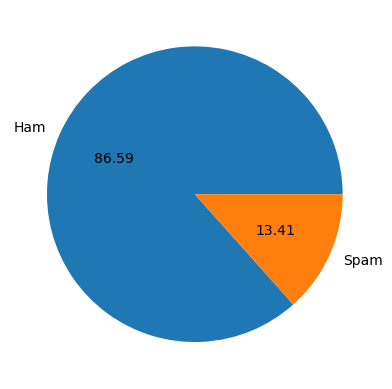

In [18]:
#Target clsss distribution
plt.pie(df.target.value_counts(), labels=['Ham','Spam'], autopct='%0.2f');

In [13]:
#find out number of charactor in the sentence.
df['no_of_char'] = df.sentence.apply(len)

In [14]:
df['no_of_words'] = df.sentence.apply(lambda x:len(nltk.word_tokenize(x)))

In [15]:
df['no_of_sentances'] = df.sentence.apply(lambda x:len(nltk.sent_tokenize(x)))


In [16]:
df

,target,sentence,no_of_char,no_of_words,no_of_sentances
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1
...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161,35,4
5568,0,Will Ì_ b going to esplanade fr home?,37,9,1
5569,0,"Pity, * was in mood for that. So...any other s...",57,15,2
5570,0,The guy did some bitching but I acted like i'd...,125,27,1


>Graphical representation of how number of charactors, word and sentence help to find out weather the email is spam or ham.

<Axes: xlabel='no_of_char', ylabel='Count'>

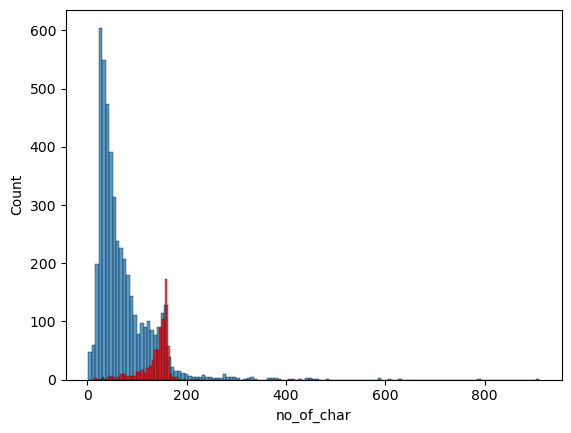

In [17]:
sns.histplot(df[df.target == 0]['no_of_char']) #ham
sns.histplot(df[df.target == 1]['no_of_char'], color='red') #Spam Message

>It is clear from the graph most of the spam messages the created by large number of charactors, words and sentence.

<Axes: xlabel='no_of_words', ylabel='Count'>

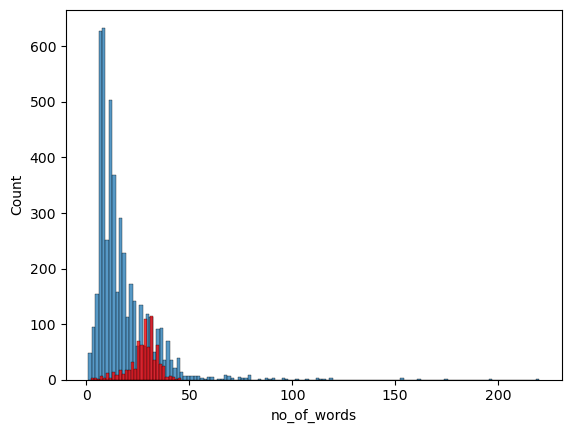

In [83]:
sns.histplot(df[df.target == 0]['no_of_words'])
sns.histplot(df[df.target == 1]['no_of_words'], color='red')

<Axes: xlabel='no_of_sentances', ylabel='Count'>

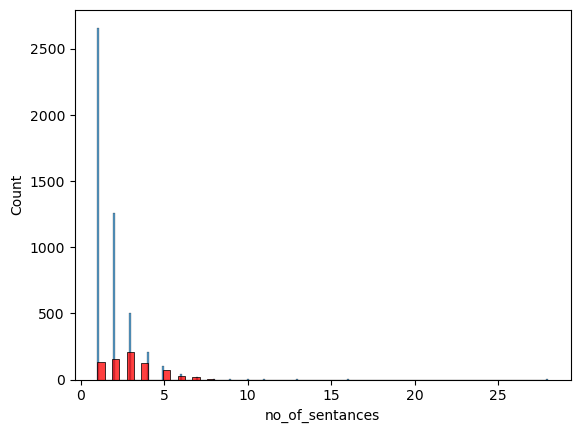

In [86]:
sns.histplot(df[df.target == 0]['no_of_sentances'])
sns.histplot(df[df.target == 1]['no_of_sentances'], color='red')

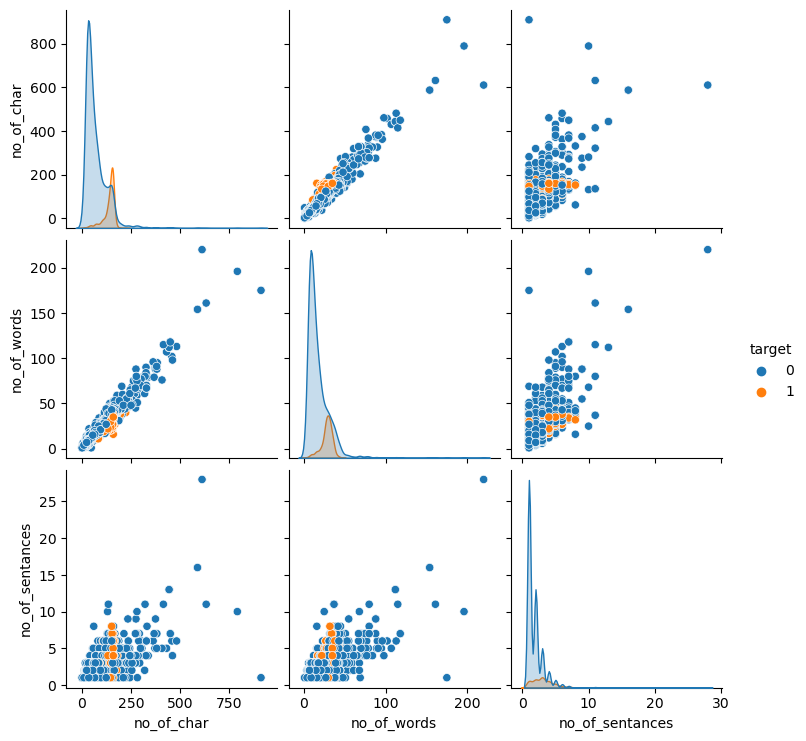

In [87]:
sns.pairplot(df, hue='target')

C:\Users\visha\AppData\Local\Temp\ipykernel_25000\621126171.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True)


<Axes: >

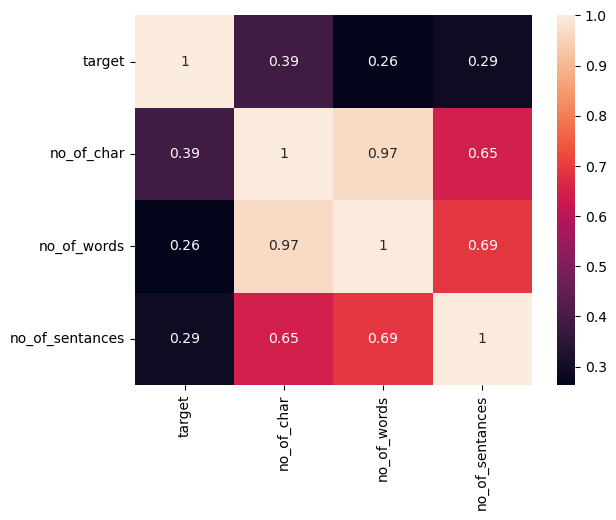

In [92]:
sns.heatmap(df.corr(), annot=True)

Data Preprocessing
1. Lower case
2. Tokenization
3. Removing special characters
4. Removing stop words and punctuation
5. Stemming

In [49]:
ps = PorterStemmer()
ps.stem('caring')

'care'

In [41]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\visha\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [12]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\visha\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [59]:
def data_Preprocess(sentences):
    sentences = sentences.lower()
    words = nltk.word_tokenize(sentences)
    words = [word for word in words if word.isalnum()]
    words = [word for word in words if word not in stopwords.words('english') and word not in string.punctuation]
    words = [ps.stem(word) for word in words]
           
    return " ".join(words)

In [61]:
df['sentence'] = df.sentence.apply(data_Preprocess)

In [62]:
df

,target,sentence,no_of_char,no_of_words,no_of_sentances
0,0,go jurong point crazi avail bugi n great world...,111,24,2
1,0,ok lar joke wif u oni,29,8,2
2,1,free entri 2 wkli comp win fa cup final tkt 21...,155,37,2
3,0,u dun say earli hor u c alreadi say,49,13,1
4,0,nah think goe usf live around though,61,15,1
...,...,...,...,...,...
5567,1,2nd time tri 2 contact u pound prize 2 claim e...,161,35,4
5568,0,b go esplanad fr home,37,9,1
5569,0,piti mood suggest,57,15,2
5570,0,guy bitch act like interest buy someth els nex...,125,27,1


>Creat a word cloud for the spam text

In [65]:
!pip install wordcloud

                                              0.0/151.4 kB ? eta -:--:--
     -----------------------------------    143.4/151.4 kB 4.3 MB/s eta 0:00:01
     -------------------------------------- 151.4/151.4 kB 3.0 MB/s eta 0:00:00


In [66]:
from wordcloud import WordCloud
wc = WordCloud(width=1280,height=720,min_font_size=10,background_color='white')

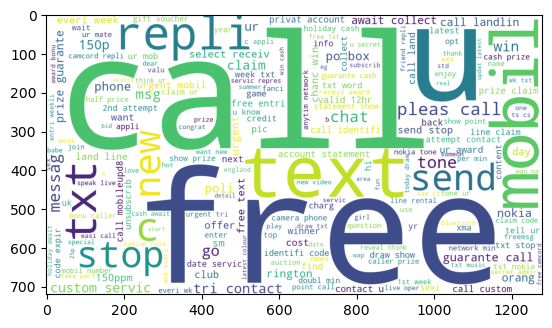

In [68]:
spam_word = wc.generate(df[df['target'] == 1]['sentence'].str.cat(sep=" "))
plt.imshow(spam_word)

In [89]:
top_spam_words = []
word_list = df[df.target == 1]['sentence'].tolist()
for words in word_list:
    for word in words.split(" "):
        top_spam_words.append(word)
top_spam_words
    

['free',
 'entri',
 '2',
 'wkli',
 'comp',
 'win',
 'fa',
 'cup',
 'final',
 'tkt',
 '21st',
 'may',
 'text',
 'fa',
 '87121',
 'receiv',
 'entri',
 'question',
 'std',
 'txt',
 'rate',
 'c',
 'appli',
 '08452810075over18',
 'freemsg',
 'hey',
 'darl',
 '3',
 'week',
 'word',
 'back',
 'like',
 'fun',
 'still',
 'tb',
 'ok',
 'xxx',
 'std',
 'chg',
 'send',
 'rcv',
 'winner',
 'valu',
 'network',
 'custom',
 'select',
 'receivea',
 'prize',
 'reward',
 'claim',
 'call',
 'claim',
 'code',
 'kl341',
 'valid',
 '12',
 'hour',
 'mobil',
 '11',
 'month',
 'u',
 'r',
 'entitl',
 'updat',
 'latest',
 'colour',
 'mobil',
 'camera',
 'free',
 'call',
 'mobil',
 'updat',
 'co',
 'free',
 '08002986030',
 'six',
 'chanc',
 'win',
 'cash',
 '100',
 'pound',
 'txt',
 'csh11',
 'send',
 'cost',
 '6day',
 'tsandc',
 'appli',
 'repli',
 'hl',
 '4',
 'info',
 'urgent',
 '1',
 'week',
 'free',
 'membership',
 'prize',
 'jackpot',
 'txt',
 'word',
 'claim',
 '81010',
 'c',
 'lccltd',
 'pobox',
 '4403ldnw

In [97]:
from collections import Counter
spam_words_count = Counter(top_spam_words).most_common(30)
spam_words_count

[('call', 365),
 ('free', 219),
 ('2', 174),
 ('txt', 169),
 ('ur', 144),
 ('u', 141),
 ('text', 139),
 ('mobil', 135),
 ('4', 120),
 ('claim', 115),
 ('stop', 114),
 ('repli', 112),
 ('prize', 94),
 ('get', 88),
 ('tone', 74),
 ('servic', 72),
 ('send', 70),
 ('new', 69),
 ('nokia', 68),
 ('award', 66),
 ('week', 62),
 ('cash', 62),
 ('urgent', 62),
 ('win', 61),
 ('contact', 61),
 ('pleas', 57),
 ('phone', 57),
 ('c', 51),
 ('custom', 51),
 ('collect', 51)]

In [108]:
sns.barplot((pd.DataFrame(spam_words_count[0]),pd.DataFrame(spam_words_count[1])))
plt.xticks(rotation='vertical')
plt.show()

ValueError: could not convert string to float: 'call'